In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Reading dataset
df=pd.read_csv('SampleSuperstore.csv')

In [4]:
# Understanding the data
# first 5 values from dataset
df.head()

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [5]:
# last 5 values from dataset
df.tail()

           Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2

In [6]:
# Dimensions of the dataset
print(df.shape)

(9994, 13)


In [7]:
# All the columns present in our dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [8]:
# datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
# cleaning the data
# checking for any missing value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [10]:
#shows unique values
df.nunique

<bound method DataFrame.nunique of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Cod

In [11]:
# checking for negative values
Postal_Code=df[(df['Postal Code']<0)]
Sales=df[(df['Sales']<0)]
Quantity=df[(df['Quantity']<0)]
Discount=df[(df['Discount']<0)]
Profit=df[(df['Profit']<0)]
print("Postal_Code column:",len(Postal_Code))
print("Sales column:",len(Sales))
print("Quantity column:",len(Quantity))
print("Discount column:",len(Discount))
print("Profit column:",len(Profit))

Postal_Code column: 0
Sales column: 0
Quantity column: 0
Discount column: 0
Profit column: 1871


In [12]:
# dropping the redundancy
df.duplicated().sum()
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [14]:
# Graphical exploration of data based on profit
# Using groupby method
ShipMode_Revenue=df.groupby(df['Ship Mode'])['Profit'].sum().sort_values()
Segment_Revenue=df.groupby(df['Segment'])['Profit'].sum().sort_values()
City_Revenue=df.groupby(df['City'])['Profit'].sum().sort_values()
State_Revenue=df.groupby(df['State'])['Profit'].sum().sort_values()
Region_Revenue=df.groupby(df['Region'])['Profit'].sum().sort_values()
Category_Revenue=df.groupby(df['Category'])['Profit'].sum().sort_values()
Subcategory_Revenue=df.groupby(df['Sub-Category'])['Profit'].sum().sort_values()
Discount_Revenue=df.groupby(df['Discount'])['Profit'].sum().sort_values()

In [17]:
# Ship mode wise revenue
ShipMode_Revenue


Ship Mode
Same Day           15891.7589
First Class        48969.8399
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

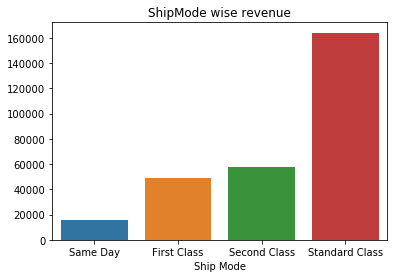

In [18]:
# Ship mode wise revenue plot
sns.barplot(ShipMode_Revenue.index,ShipMode_Revenue.values,order=ShipMode_Revenue.index)
plt.title('ShipMode wise revenue')
plt.xlabel='ShipMode'
plt.ylabel='Profit'
plt.show()

Conclusion: 
1) Least profit on Same day
2) Highest profit-> Standard Class

In [19]:
# Segment wise Revenue
Segment_Revenue

Segment
Home Office     60298.6785
Corporate       91979.1340
Consumer       134119.2092
Name: Profit, dtype: float64

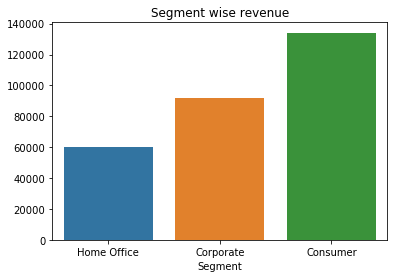

In [20]:
# Segment wise Revenue plot
sns.barplot(Segment_Revenue.index,Segment_Revenue.values,order=Segment_Revenue.index)
plt.title('Segment wise revenue')
plt.xlabel='Segment'
plt.ylabel='Profit'
plt.show()

Conclusion: 
1) Least profit at Home Office
2) Highest profit at Consumer


In [21]:
# City wise Revenue
City_Revenue

City
Philadelphia    -13837.7674
Houston         -10153.5485
San Antonio      -7299.0502
Lancaster        -7239.0684
Chicago          -6654.5688
                    ...    
Detroit          13181.7908
San Francisco    17507.3854
Seattle          29156.0967
Los Angeles      30440.7579
New York City    62036.9837
Name: Profit, Length: 531, dtype: float64

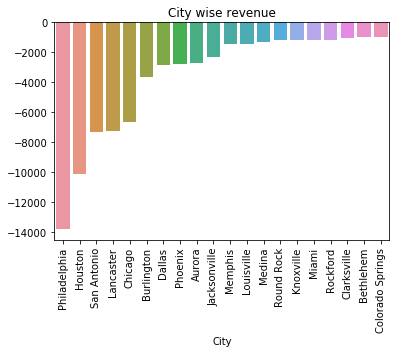

In [22]:
# City wise Revenue plot
sns.barplot(City_Revenue.iloc[0:20].index,City_Revenue.iloc[0:20].values,order=City_Revenue.iloc[0:20].index)
plt.title('City wise revenue')
plt.xticks(rotation=90)
plt.ylabel='Profit'
plt.show()

Conclusion:
1) Highest loss in Philadelphia
2) Working on negative profits (losses) would enhance the net profit


In [23]:
# State wise Revenue
State_Revenue

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

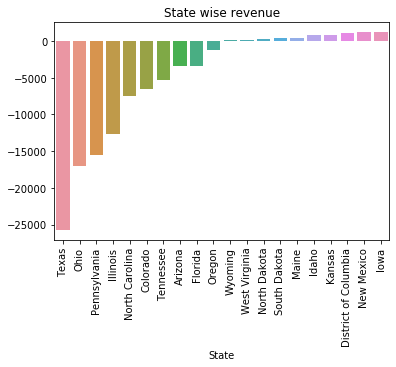

In [24]:
# State wise Revenue plot
sns.barplot(State_Revenue.iloc[0:20].index,State_Revenue.iloc[0:20].values,order=State_Revenue.iloc[0:20].index)
plt.title('State wise revenue')
plt.xticks(rotation=90)
plt.ylabel='Profit'
plt.show()


Conclusion:
1) Highest loss in Texas
2) Focusing on the states like Texas, Ohio, Pennsylvania and many more 
   and acting on it would affect the net profit.

In [25]:
# Region wise Revenue
Region_Revenue

Region
Central     39706.3625
South       46749.4303
East        91522.7800
West       108418.4489
Name: Profit, dtype: float64

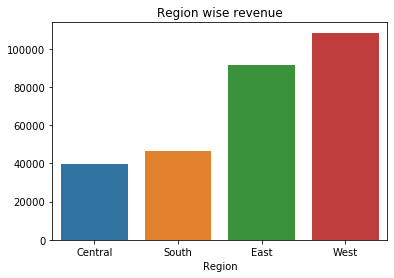

In [26]:
# Region wise Revenue plot
sns.barplot(Region_Revenue.index,Region_Revenue.values,order=Region_Revenue.index)
plt.title('Region wise revenue')
plt.xlabel='Region'
plt.ylabel='Profit'
plt.show()

Conclusion:
1) Lowest Profit in Central Region
2) Highest Profit in Western Region


In [27]:
# Category wise Revenue
Category_Revenue

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

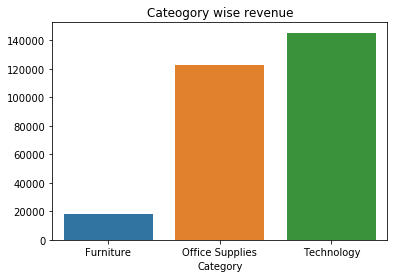

In [28]:
# Category wise Revenue plot
sns.barplot(Category_Revenue.index,Category_Revenue.values,order=Category_Revenue.index)
plt.title('Cateogory wise revenue')
plt.xlabel='Category'
plt.ylabel='Profit'
plt.show()

Conclusion:
1) Lowest profit in Furniture Category
2) Highest profit in Technology Category

In [29]:
# Sub-category wise Revenue
Subcategory_Revenue

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

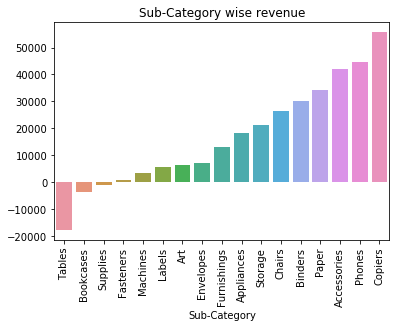

In [30]:
# Sub-category wise Revenue plot
sns.barplot(Subcategory_Revenue.index,Subcategory_Revenue.values,order=Subcategory_Revenue.index)
plt.title('Sub-Category wise revenue')
plt.xticks(rotation=90)
plt.ylabel='Profit'
plt.show()

Conclusion: 
1) Highest loss in Tables Sub-category
2) Highest profit in Copiers Sub-category

In [31]:
# Discount wise Revenue
Discount_Revenue

Discount
0.70    -40075.3569
0.80    -30539.0392
0.40    -23057.0504
0.50    -20506.4281
0.30    -10369.2774
0.60     -5944.6552
0.45     -2493.1111
0.32     -2391.1377
0.15      1418.9915
0.10      9029.1770
0.20     90337.3060
0.00    320987.6032
Name: Profit, dtype: float64

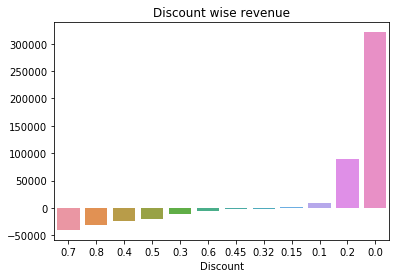

In [32]:
# Discount wise Revenue plot
sns.barplot(Discount_Revenue.index,Discount_Revenue.values,order=Discount_Revenue.index)
plt.title('Discount wise revenue')
plt.xlabel='Discount'
plt.ylabel='Profit'
plt.show()

Conclusion: 
1) Highest loss when the discount is more.
2) Highest profit when there is no discount at all